# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
# URL raw file
url = "https://raw.githubusercontent.com/sugengcahyono/Machine_Learning/main/Clustering/hasil_clustering_penjualan.csv"

# Membaca file CSV dari URL
data = pd.read_csv(url)

data.head()

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Cluster
0,2022-05-08,40,1000,1800,1800000,0
1,2022-05-08,49,1000,1900,1900000,0
2,2022-05-08,21,5000,750,3750000,1
3,2022-05-08,21,1000,1200,1200000,0
4,2022-07-08,29,1000,1550,1550000,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:

# Pisahkan fitur dan label
X = data.drop(columns=["Cluster"])  # Fitur
y = data["Cluster"]  # Label (target)

# Membagi data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Menghitung jumlah data total
print("Jumlah data total: ", len(X))

# Menghitung jumlah data pada X_train (data latih)
print("Jumlah data latih: ", len(X_train))

# Menghitung jumlah data pada X_test (data uji)
print("Jumlah data uji: ", len(X_test))


Jumlah data total:  1076
Jumlah data latih:  860
Jumlah data uji:  216


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [18]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], dayfirst=True, errors='coerce')

# Konfirmasi tipe data setelah konversi
print("Tipe data kolom setelah konversi:")
print(data.dtypes)

Tipe data kolom setelah konversi:
Tanggal         datetime64[ns]
Jenis Produk             int64
Jumlah Order             int64
Harga                    int64
Total                    int64
Cluster                  int64
dtype: object


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Mengonversi kolom 'Tanggal' menjadi datetime dan kemudian timestamp
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
data['Tanggal'] = data['Tanggal'].astype(int) / 10**9  # Mengonversi menjadi detik sejak epoch (timestamp)

# Memisahkan fitur (X) dan label (y)
X = data[['Tanggal', 'Jenis Produk', 'Jumlah Order', 'Harga', 'Total']]
y = data['Cluster']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Output konfirmasi
print("Model training selesai.")


Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.



1.   Mengonversi Tanggal menjadi Angka
Kolom Tanggal diubah menjadi angka yang mewakili waktu (dalam detik sejak 1970). Hal ini diperlukan karena KNN hanya bisa bekerja dengan data numerik.
2.   Memisahkan Fitur dan Label
*   Fitur (X) adalah informasi yang digunakan untuk memprediksi hasil. Di sini, fitur yang digunakan adalah Tanggal, Jenis Produk, Jumlah Order, Harga, dan Total.
*   Label (y) adalah hasil yang ingin diprediksi. Dalam hal ini, labelnya adalah kolom Cluster yang menunjukkan kelompok mana data tersebut masuk.

3.   Pembagian Data
Data dibagi menjadi dua bagian:
*   Data latih (Training data) untuk melatih model. Data uji (Test data) untuk menguji model setelah dilatih. Pembagian ini membantu model agar tidak hanya menghafal data, tetapi bisa membuat prediksi pada data yang belum pernah dilihat sebelumnya.

4.   Melatih Model KNN
*   Model KNN (K-Nearest Neighbors) bekerja dengan cara mencari data-data yang mirip (tetangga terdekat) dari data yang ingin diprediksi. Model ini kemudian mengklasifikasikan data berdasarkan mayoritas label dari tetangga terdekat tersebut.







## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9722222222222222
F1-Score: 0.9716398929049531
Precision: 0.9732084155161078
Recall: 0.9722222222222222


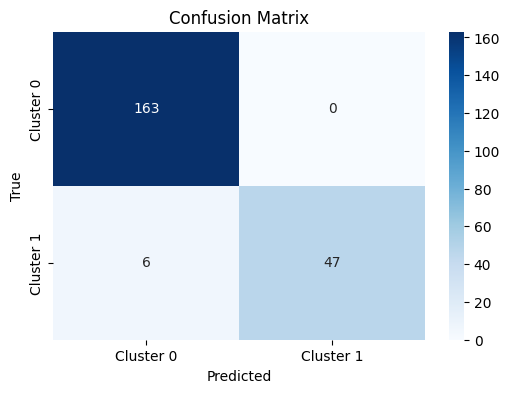

In [20]:

# Prediksi menggunakan data uji
y_pred = knn.predict(X_test)

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Average bisa diganti sesuai kebutuhan ('micro', 'macro', 'weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

# Menampilkan metrik
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix menggunakan Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Cluster 0', 'Cluster 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.



1.   Hasil Evaluasi
*   Accuracy: 0.972 (97.2%). Model berhasil memprediksi dengan akurat 97,2% dari keseluruhan data uji.
*   F1-Score: 0.972. F1-Score mengukur keseimbangan antara Precision dan Recall. Nilai yang tinggi menunjukkan model memiliki performa yang baik dalam hal keseimbangan antara keduanya.
*   Precision: 0.973. Precision menunjukkan persentase prediksi positif yang benar. Dalam hal ini, model sangat baik dalam memprediksi kelas positif dengan tingkat kesalahan yang sangat rendah.
*   Recall: 0.972. Recall menunjukkan kemampuan model untuk menangkap sebanyak mungkin data positif yang ada. Model ini juga sangat baik dalam menangkap mayoritas data positif.

2.   Confusion Matrix
*   163 prediksi benar untuk kelas 0.
*   47 prediksi benar untuk kelas 1.
*   6 kesalahan prediksi kelas 1 (false negatives).
*   Tidak ada kesalahan prediksi untuk kelas 0 (false positives).

3.   Analisis


*   False Negatives: Model memiliki 6 kesalahan pada kelas 1, yang berarti 6 data yang seharusnya diprediksi sebagai kelas 1, malah diprediksi sebagai kelas 0.
*   Precision dan Recall: Nilai Precision dan Recall yang sangat tinggi menunjukkan bahwa model dapat membedakan kelas dengan sangat baik. Namun, jika kita lebih fokus pada kelas minoritas (misalnya kelas 1), perlu diperhatikan bahwa ada 6 kesalahan pada kelas ini. Meskipun demikian, secara keseluruhan performa model sudah sangat baik.



4.   Overfitting atau Underfitting
*   Overfitting: Tidak ada indikasi overfitting, karena model dapat mengklasifikasikan dengan baik data uji (berdasarkan akurasi yang tinggi). Jika model overfitting, akurasi pada data latih akan jauh lebih tinggi daripada pada data uji, yang tidak terjadi di sini.
*   Underfitting: Model tidak menunjukkan tanda-tanda underfitting, karena model berhasil memprediksi dengan baik pada data uji, dan nilai evaluasi (Accuracy, F1-Score, Precision, Recall) cukup tinggi.


5.   Rekomendasi
*   Meskipun model sudah menunjukkan hasil yang sangat baik, menambah jumlah data atau data yang lebih beragam bisa membantu mengurangi kesalahan pada kelas yang lebih sedikit (kelas 1). Ini juga bisa memperbaiki performa pada kondisi kelas yang tidak seimbang. Meskipun KNN bekerja dengan baik, Mungkin bisa mempertimbangkan untuk mencoba algoritma lain seperti Random Forest atau Support Vector Machine (SVM) untuk melihat apakah hasilnya lebih baik, terutama jika masalah klasifikasi ini sangat kompleks atau data sangat besar.












